In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.datasets import load_digits   #predefined datasets

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data[0]    #8x8 image

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

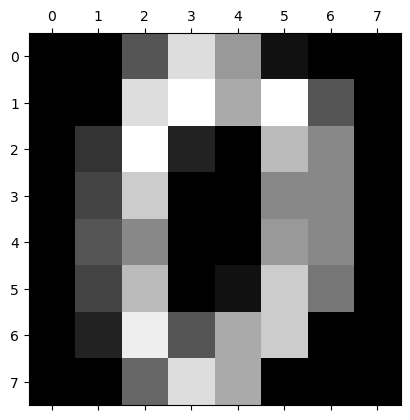

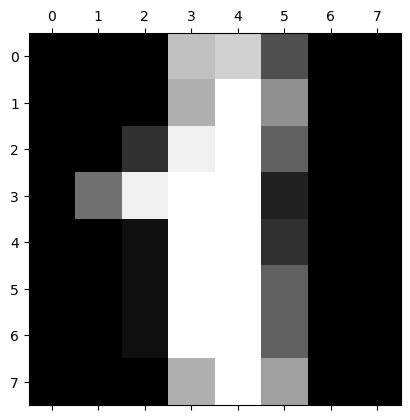

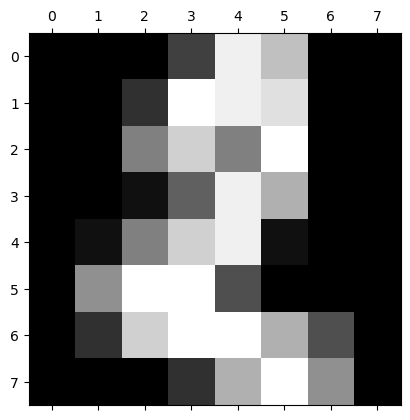

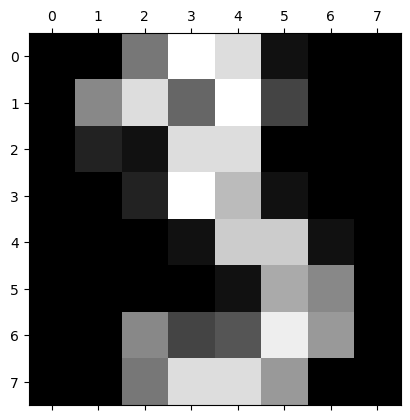

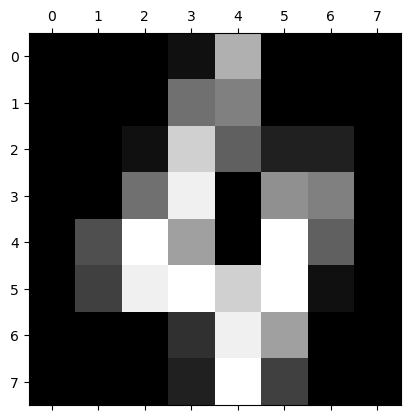

In [14]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])  #shows the image of the corresponding digit

In [17]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [40]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2) # change the data_set to change the accuracy

In [26]:
len(X_train)

1437

In [25]:
len(X_test)

360

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=3000) #increase the number of iteration

In [77]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [78]:
model.score(X_test, y_test)

0.9611111111111111

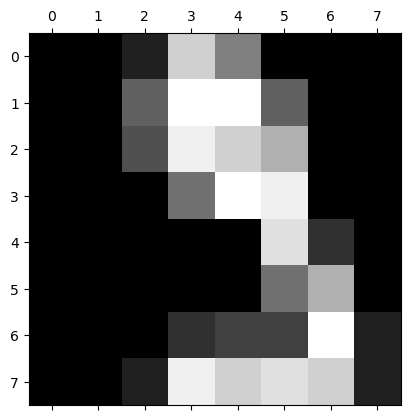

In [81]:
plt.matshow(digits.images[31])

In [83]:
digits.target[31]

9

In [86]:
model.predict([digits.data[31]])

array([9])

In [88]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

# confusion matrix

In [90]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 34,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  4,  0,  1,  1,  1,  0,  0, 27,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

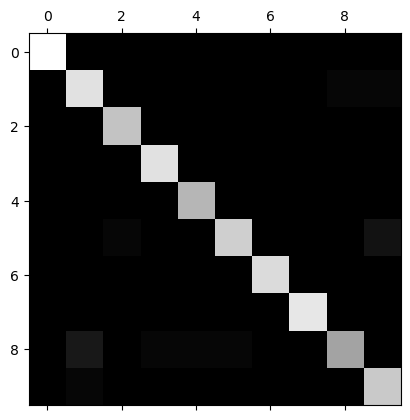

In [91]:
plt.matshow(cm)

Text(95.72222222222221, 0.5, 'Truth')

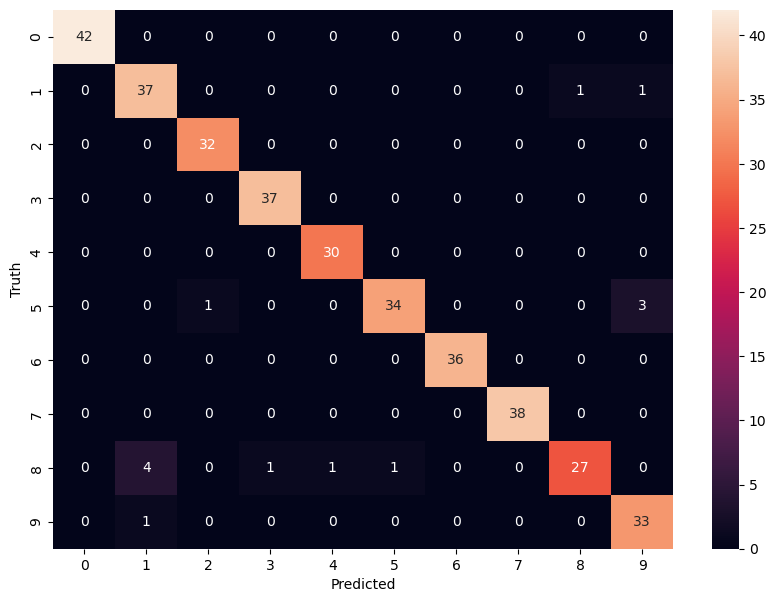

In [92]:
import seaborn as sn   #this library is used for visualization
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')